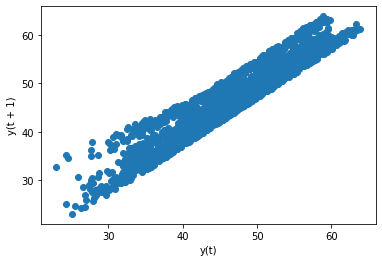

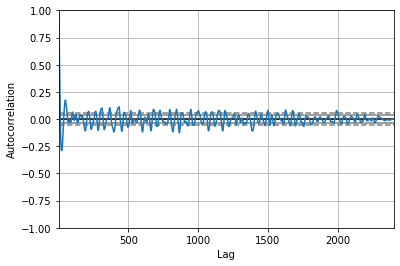

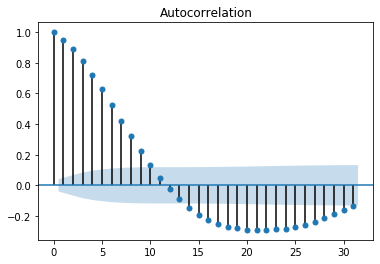

Test MSE: 17.491


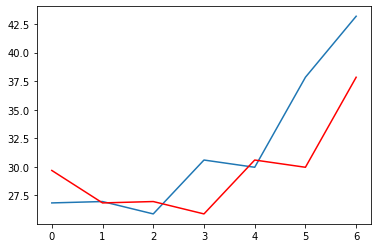

Lag: 27
Coefficients: [ 5.78887608e+00  1.05017419e+00 -3.07143068e-02  8.25440870e-03
 -3.94942215e-02 -3.07227663e-02  7.63349094e-04 -3.73291949e-02
 -4.21720177e-03  3.34706048e-03 -2.36753575e-02  1.50464463e-02
 -2.84086433e-02  5.92958216e-03 -3.73089640e-02  3.87138564e-02
  8.84078028e-03 -1.10323211e-02 -3.82745055e-03  3.56821410e-02
 -3.75247781e-02  3.70179565e-02 -2.82952946e-02  8.56909490e-03
 -4.72688461e-02  9.98902826e-03 -1.99381489e-02  3.24727334e-02]
predicted=31.185634, expected=26.844812
predicted=32.539433, expected=26.965417
predicted=34.076637, expected=25.882581
predicted=35.303304, expected=30.597672
predicted=37.140770, expected=29.963825
predicted=39.114687, expected=37.840868
predicted=40.859045, expected=43.178510
Test MSE: 28.244


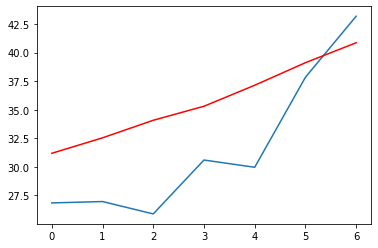

predicted=31.185634, expected=26.844812
predicted=27.980814, expected=26.965417
predicted=28.356274, expected=25.882581
predicted=26.833488, expected=30.597672
predicted=32.576139, expected=29.963825
predicted=32.008041, expected=37.840868
predicted=40.194459, expected=43.178510
Test MSE: 12.845


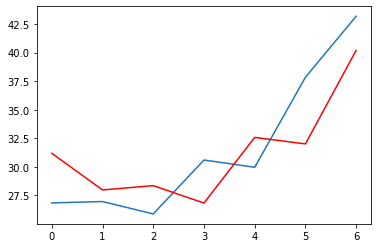

In [2]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt  # Подключаем все необходимые модули
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


#Данный скрипт предсказывает обучается на определенном наборе данных, а затем предсказывает
#последние 7 значений и сравнивает результаты с исходными, используя немного
#отличающиеся друг от друга методы авторегрессии

def init(fileName):  # Инициализация исходных табличных данных

    arrays = [[], [], [], [], [], [],
              [], [], [], [], [], [],
              [], [], [], [], [], [],
              [], [], [], [], [], [],
              []]
    
    file = open(fileName,'r')  #'Задание PdM.csv'
    
    numOfLine = 0
    for line in file:
        numOfArray = 0;
        arrays[numOfArray].append('')
        for element in line:
            if (element != '\n'):
                if (element == ';'):
                      numOfArray = numOfArray + 1
                      arrays[numOfArray].append('')
                else:
                    arrays[numOfArray][numOfLine] = arrays[numOfArray][numOfLine] + str(element)
        numOfLine = numOfLine + 1
            
    return arrays


arrays = init('Задание PdM.csv')

N = arrays[0][1::]  # Инициализация данных
Time_Count = arrays[2][1::]
Mode = arrays[3][1::]
T_1 = arrays[4][1::]
T_2 = arrays[5][1::]
T_3 = arrays[6][1::]
T_4 = arrays[7][1::]
T_5 = arrays[8][1::]
T_6 = arrays[9][1::]
T_7 = arrays[10][1::]
T_8 = arrays[11][1::]
T_9 = arrays[12][1::]
T_10 = arrays[13][1::]
S_1 = arrays[14][1::]
S_2 = arrays[15][1::]
S_3 = arrays[16][1::]
S_4 = arrays[17][1::]
S_5 = arrays[18][1::]
S_6 = arrays[19][1::]
S_7 = arrays[20][1::]
S_8 = arrays[21][1::]
S_9 = arrays[22][1::]
S_10 = arrays[23][1::]
System_State = arrays[24][1::]

for i in range(len(S_1)):
    if (S_1[i] == 'True'):
        S_1[i] = 1.0
    if (S_1[i] == 'False'):
        S_1[i] = 0.0

for i in range(len(T_1)):
    T_1[i] = float(T_1[i])


#plt.plot(T_1)

series = Series(T_1)
lag_plot(series)
pyplot.show()

autocorrelation_plot(series)
pyplot.show()

plot_acf(series, lags=31)
pyplot.show()


# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()




# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()




X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
